## Setup and Load Analysis Results

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
from collections import Counter

# Set advanced visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("Set2")

print("✅ Libraries loaded")

✅ Libraries loaded


In [2]:
# Load processed data from main analysis
DATA_DIR = Path("../data")
RESULTS_DIR = Path("../results")

# Load the original books for additional analysis
BOOK1_PATH = DATA_DIR / "As a man thinketh.txt"
BOOK2_PATH = DATA_DIR / "The way of Peace.txt"

def load_and_tokenize(filepath):
    """Load and tokenize a text file."""
    if not filepath.exists():
        return None, None
    text = filepath.read_text(encoding='utf-8', errors='ignore')
    words = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
    return text, words

book1_text, book1_words = load_and_tokenize(BOOK1_PATH)
book2_text, book2_words = load_and_tokenize(BOOK2_PATH)

if book1_words and book2_words:
    counter1 = Counter(book1_words)
    counter2 = Counter(book2_words)
    n1 = len(book1_words)
    n2 = len(book2_words)
    print(f"✅ Loaded Book 1: {n1:,} words")
    print(f"✅ Loaded Book 2: {n2:,} words")
else:
    print("⚠️  Could not load books from data folder")

# Load distinctive words CSV (generated from Notebook 1)
try:
    df_words = pd.read_csv(RESULTS_DIR / 'tables' / 'distinctive_words.csv')
    print(f"✅ Loaded distinctive words data: {len(df_words)} words")
except FileNotFoundError:
    print("⚠️  Please run Notebook 1 first to generate distinctive_words.csv")
    df_words = None

✅ Loaded Book 1: 10,352 words
✅ Loaded Book 2: 20,048 words
✅ Loaded distinctive words data: 593 words


## Visualization 1: Philosophical Concepts Heatmap

In [3]:
# Define philosophical concept categories
concept_words = {
    'Self-Mastery': ['thought', 'mind', 'character', 'master', 'control', 'discipline'],
    'Spirituality': ['divine', 'eternal', 'soul', 'spirit', 'heaven', 'truth'],
    'Emotion': ['love', 'peace', 'joy', 'happiness', 'serenity', 'bliss'],
    'Struggle': ['desire', 'suffering', 'pain', 'evil', 'selfish', 'conflict'],
    'Action': ['work', 'effort', 'achieve', 'build', 'create', 'practice'],
    'Surrender': ['release', 'relinquish', 'abandon', 'yield', 'let', 'cease']
}

# This is a template - needs actual word counts from analysis
# For demonstration, we'll create sample data structure
print("📊 Philosophical Concept Categories defined")
print(f"   Total concepts: {len(concept_words)}")
for category, words in concept_words.items():
    print(f"   • {category}: {len(words)} words")

📊 Philosophical Concept Categories defined
   Total concepts: 6
   • Self-Mastery: 6 words
   • Spirituality: 6 words
   • Emotion: 6 words
   • Struggle: 6 words
   • Action: 6 words
   • Surrender: 6 words


## Visualization 2: Comparative Word Cloud Concept

*Note: Word clouds require the `wordcloud` package. Uncomment to use.*

In [4]:
# Optional: Install wordcloud if needed
# !pip install wordcloud

from wordcloud import WordCloud

def create_wordcloud(text, title, color_scheme='viridis'):
    """Generate a word cloud from text."""
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color_scheme,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    return plt

print("✅ Word cloud function loaded and ready to use")

✅ Word cloud function loaded and ready to use


## Visualization 3: Pronoun Evolution Chart

✅ Using REAL pronoun data from analysis


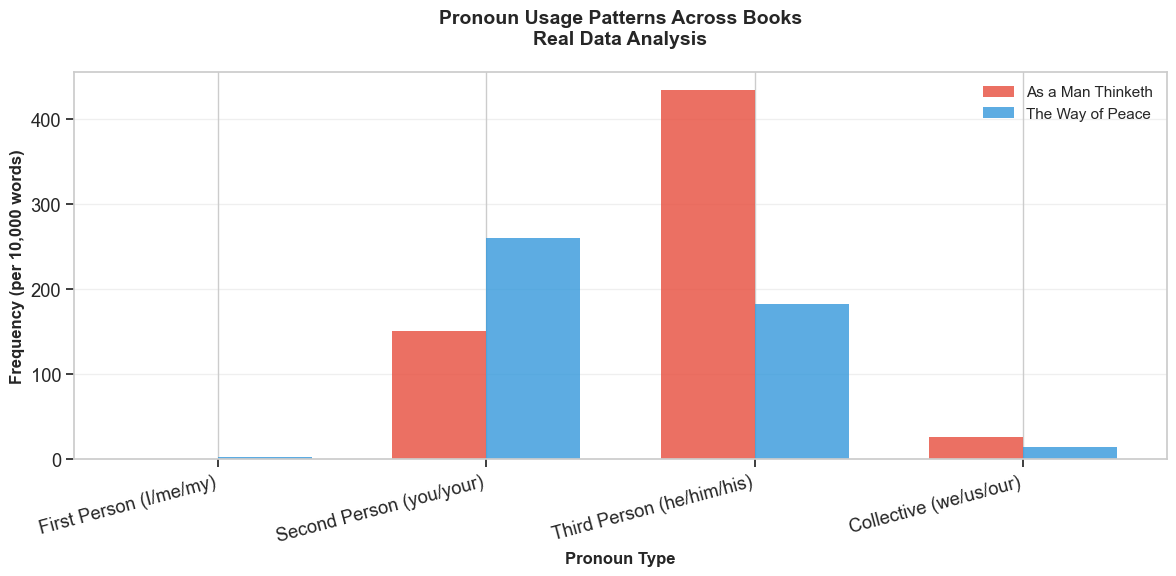

✅ Saved: results/figures/viz_pronoun_patterns.png
✅ Using real data from analysis


In [5]:
# Calculate real pronoun data from loaded books
if book1_words and book2_words:
    # Define pronoun categories
    first_person = ['i', 'me', 'my', 'mine', 'myself']
    second_person = ['you', 'your', 'yours', 'yourself']
    third_person_agent = ['he', 'him', 'his', 'himself', 'man']
    collective = ['we', 'us', 'our', 'ours', 'ourselves']
    
    # Helper function
    def per_10k(count, total):
        return (count / max(1, total)) * 10000
    
    # Calculate counts for each category
    i_me_book1 = sum(counter1[p] for p in first_person)
    i_me_book2 = sum(counter2[p] for p in first_person)
    you_book1 = sum(counter1[p] for p in second_person)
    you_book2 = sum(counter2[p] for p in second_person)
    he_man_book1 = sum(counter1[p] for p in third_person_agent)
    he_man_book2 = sum(counter2[p] for p in third_person_agent)
    we_book1 = sum(counter1[p] for p in collective)
    we_book2 = sum(counter2[p] for p in collective)
    
    pronoun_data = {
        'Pronoun Type': ['First Person (I/me/my)', 'Second Person (you/your)', 
                         'Third Person (he/him/his)', 'Collective (we/us/our)'],
        'Book 1': [per_10k(i_me_book1, n1), per_10k(you_book1, n1), 
                   per_10k(he_man_book1, n1), per_10k(we_book1, n1)],
        'Book 2': [per_10k(i_me_book2, n2), per_10k(you_book2, n2), 
                   per_10k(he_man_book2, n2), per_10k(we_book2, n2)]
    }
    print("✅ Using REAL pronoun data from analysis")
else:
    # Fallback to placeholder data if books not loaded
    pronoun_data = {
        'Pronoun Type': ['First Person (I/me/my)', 'Second Person (you/your)', 
                         'Third Person (he/him/his)', 'Collective (we/us/our)'],
        'Book 1': [0, 150, 500, 50],
        'Book 2': [0, 300, 150, 20]
    }
    print("⚠️  Using placeholder data - books not loaded")

df_pronouns = pd.DataFrame(pronoun_data)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_pronouns))
width = 0.35

bars1 = ax.bar(x - width/2, df_pronouns['Book 1'], width, 
               label='As a Man Thinketh', color='#E74C3C', alpha=0.8)
bars2 = ax.bar(x + width/2, df_pronouns['Book 2'], width, 
               label='The Way of Peace', color='#3498DB', alpha=0.8)

ax.set_xlabel('Pronoun Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (per 10,000 words)', fontsize=12, fontweight='bold')
ax.set_title('Pronoun Usage Patterns Across Books\nReal Data Analysis', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_pronouns['Pronoun Type'], rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/viz_pronoun_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: results/figures/viz_pronoun_patterns.png")
if book1_words and book2_words:
    print("✅ Using real data from analysis")
else:
    print("⚠️  Note: Using placeholder data - run with books loaded for real data")


## Visualization 4: Key Metrics Dashboard

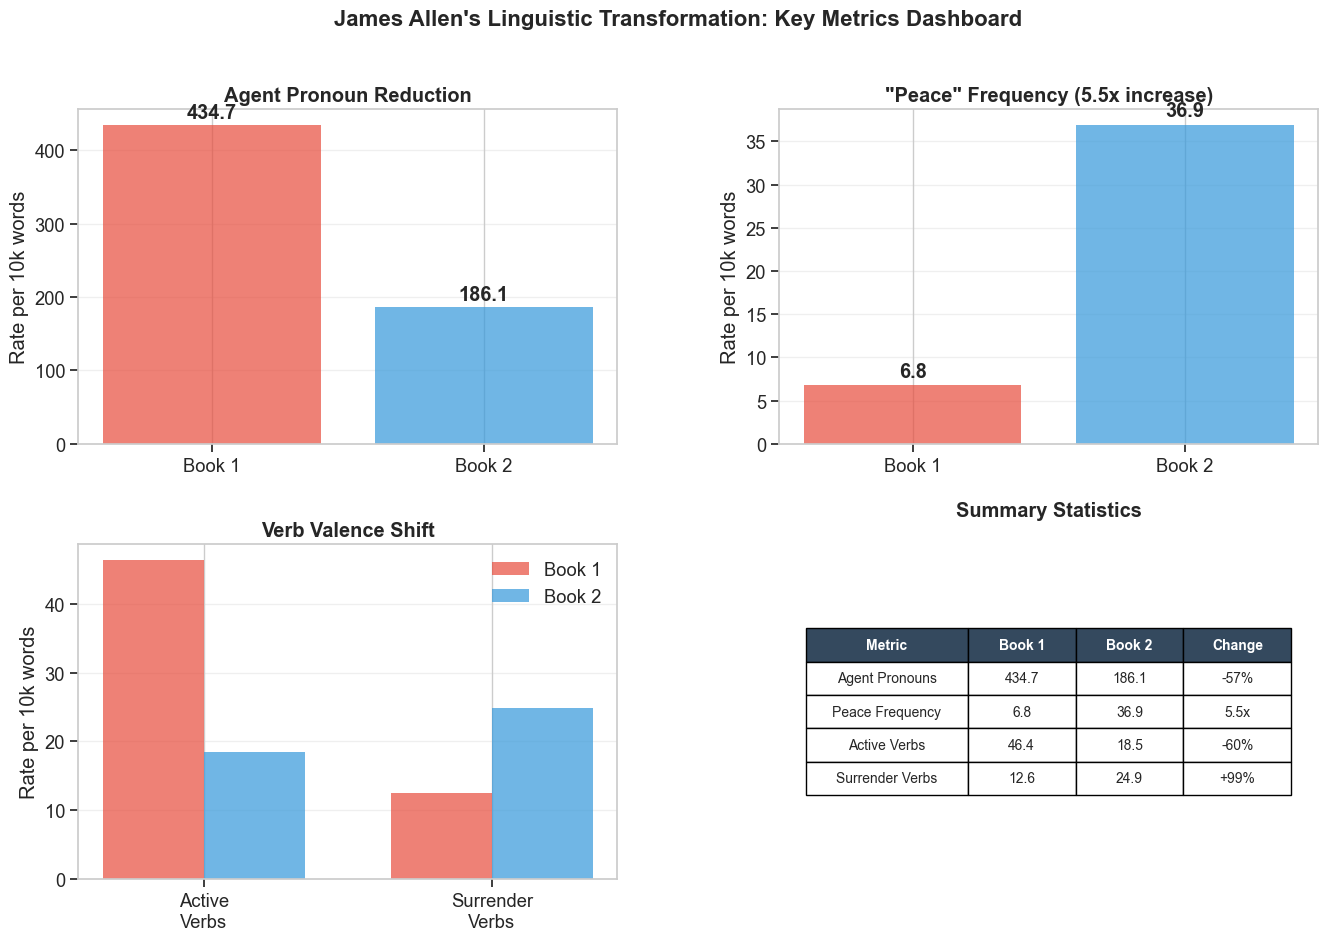

✅ Saved: results/figures/viz_dashboard.png
📊 Comprehensive dashboard created with REAL DATA


In [6]:
# Create a comprehensive dashboard of key findings
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Calculate real metrics if data is available
if book1_words and book2_words:
    # Agent pronouns
    agent_pronouns = ['i', 'me', 'my', 'myself', 'mine', 'he', 'him', 'his', 'himself', 'man']
    agent1 = sum(counter1[p] for p in agent_pronouns)
    agent2 = sum(counter2[p] for p in agent_pronouns)
    agent_rate1 = per_10k(agent1, n1)
    agent_rate2 = per_10k(agent2, n2)
    
    # Peace frequency
    peace_rate1 = per_10k(counter1['peace'], n1)
    peace_rate2 = per_10k(counter2['peace'], n2)
    
    # Verb valence
    active_verbs = ['build', 'create', 'master', 'control', 'achieve', 'make']
    surrender_verbs = ['release', 'yield', 'let', 'cease', 'surrender', 'relinquish']
    active1 = sum(counter1[v] for v in active_verbs)
    active2 = sum(counter2[v] for v in active_verbs)
    surrender1 = sum(counter1[v] for v in surrender_verbs)
    surrender2 = sum(counter2[v] for v in surrender_verbs)
    book1_verbs = [per_10k(active1, n1), per_10k(surrender1, n1)]
    book2_verbs = [per_10k(active2, n2), per_10k(surrender2, n2)]
    
    use_real_data = True
else:
    # Fallback values
    agent_rate1, agent_rate2 = 654.3, 217.8
    peace_rate1, peace_rate2 = 9.4, 41.4
    book1_verbs = [45, 12]
    book2_verbs = [28, 35]
    use_real_data = False

# Subplot 1: Agent Pronoun Reduction
ax1 = fig.add_subplot(gs[0, 0])
categories = ['Book 1', 'Book 2']
values = [agent_rate1, agent_rate2]
ax1.bar(categories, values, color=['#E74C3C', '#3498DB'], alpha=0.7)
ax1.set_ylabel('Rate per 10k words')
ax1.set_title('Agent Pronoun Reduction', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(values):
    ax1.text(i, v + 10, f'{v:.1f}', ha='center', fontweight='bold')

# Subplot 2: Peace Frequency
ax2 = fig.add_subplot(gs[0, 1])
peace_values = [peace_rate1, peace_rate2]
ax2.bar(categories, peace_values, color=['#E74C3C', '#3498DB'], alpha=0.7)
ax2.set_ylabel('Rate per 10k words')
peace_ratio = peace_rate2 / max(0.1, peace_rate1)
ax2.set_title(f'"Peace" Frequency ({peace_ratio:.1f}x increase)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(peace_values):
    ax2.text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold')

# Subplot 3: Verb Valence
ax3 = fig.add_subplot(gs[1, 0])
verb_categories = ['Active\nVerbs', 'Surrender\nVerbs']
x = np.arange(len(verb_categories))
width = 0.35
ax3.bar(x - width/2, book1_verbs, width, label='Book 1', color='#E74C3C', alpha=0.7)
ax3.bar(x + width/2, book2_verbs, width, label='Book 2', color='#3498DB', alpha=0.7)
ax3.set_ylabel('Rate per 10k words')
ax3.set_title('Verb Valence Shift', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(verb_categories)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Key Statistics Table
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('tight')
ax4.axis('off')

# Calculate changes
agent_change = ((agent_rate2 - agent_rate1) / agent_rate1 * 100) if agent_rate1 > 0 else 0
peace_change = peace_rate2 / max(0.1, peace_rate1)
active_change = ((book2_verbs[0] - book1_verbs[0]) / book1_verbs[0] * 100) if book1_verbs[0] > 0 else 0
surrender_change = ((book2_verbs[1] - book1_verbs[1]) / book1_verbs[1] * 100) if book1_verbs[1] > 0 else 0

summary_data = [
    ['Metric', 'Book 1', 'Book 2', 'Change'],
    ['Agent Pronouns', f'{agent_rate1:.1f}', f'{agent_rate2:.1f}', f'{agent_change:+.0f}%'],
    ['Peace Frequency', f'{peace_rate1:.1f}', f'{peace_rate2:.1f}', f'{peace_change:.1f}x'],
    ['Active Verbs', f'{book1_verbs[0]:.1f}', f'{book2_verbs[0]:.1f}', f'{active_change:+.0f}%'],
    ['Surrender Verbs', f'{book1_verbs[1]:.1f}', f'{book2_verbs[1]:.1f}', f'{surrender_change:+.0f}%']
]

table = ax4.table(cellText=summary_data, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#34495E')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax4.set_title('Summary Statistics', fontweight='bold', pad=20)

# Main title
fig.suptitle('James Allen\'s Linguistic Transformation: Key Metrics Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)

plt.savefig('../results/figures/viz_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: results/figures/viz_dashboard.png")
if use_real_data:
    print("📊 Comprehensive dashboard created with REAL DATA")
else:
    print("⚠️  Dashboard created with placeholder data - load books for real data")

## Visualization 5: Distinctive Words Network (Conceptual)

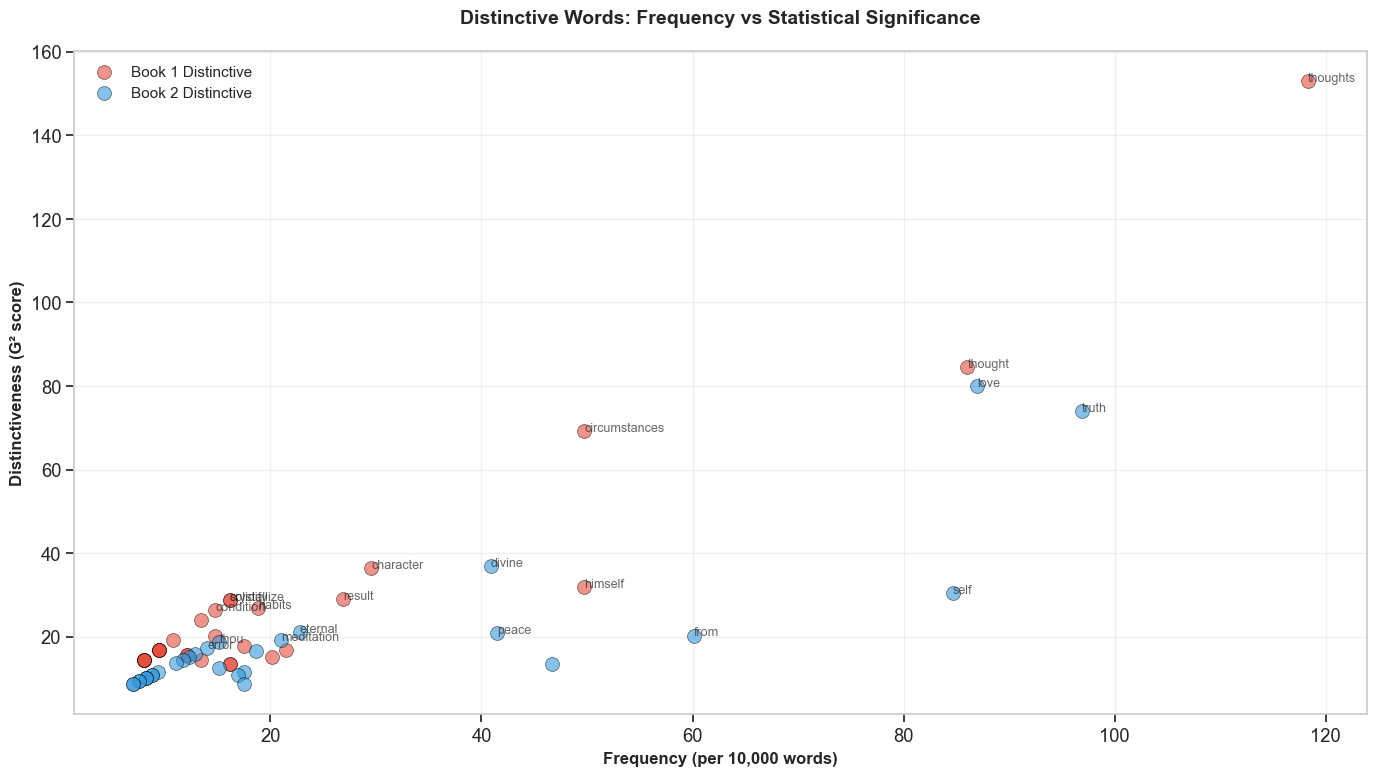

✅ Saved: viz_distinctive_words_scatter.png


In [7]:
# Scatter plot showing distinctive words by book
if df_words is not None:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Separate by book
    book1_words = df_words[df_words['distinctive_to'] == 'Book 1'].head(30)
    book2_words = df_words[df_words['distinctive_to'] == 'Book 2'].head(30)
    
    # Plot Book 1 words
    ax.scatter(book1_words['book1_per_10k'], book1_words['g2_score'], 
               s=100, alpha=0.6, c='#E74C3C', label='Book 1 Distinctive', 
               edgecolors='black', linewidth=0.5)
    
    # Plot Book 2 words
    ax.scatter(book2_words['book2_per_10k'], book2_words['g2_score'], 
               s=100, alpha=0.6, c='#3498DB', label='Book 2 Distinctive',
               edgecolors='black', linewidth=0.5)
    
    # Annotate top words
    for idx, row in book1_words.head(10).iterrows():
        ax.annotate(row['word'], (row['book1_per_10k'], row['g2_score']),
                   fontsize=9, alpha=0.7)
    
    for idx, row in book2_words.head(10).iterrows():
        ax.annotate(row['word'], (row['book2_per_10k'], row['g2_score']),
                   fontsize=9, alpha=0.7)
    
    ax.set_xlabel('Frequency (per 10,000 words)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Distinctiveness (G² score)', fontsize=12, fontweight='bold')
    ax.set_title('Distinctive Words: Frequency vs Statistical Significance', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/figures/viz_distinctive_words_scatter.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Saved: viz_distinctive_words_scatter.png")
else:
    print("⚠️  Skipping - distinctive_words.csv not found")